# Introduction to data visualization with Matplotlib

## Quantitative comparisons: bar-charts

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
olympics = pd.read_csv('data/olympics.csv', index_col = [0])

In [3]:
olympics.head()

,No_Summer,Gold_Summer,Silver_Summer,Bronze_Summer,Total_Summer,No_Winter,Gold_Winter,Silver_Winter,Bronze_Winter,Total_Winter,Total_No_Games,Gold_Total,Silver_Total,Bronze_Total,Combined_Total
Afghanistan (AFG),13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
Algeria (ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
Argentina (ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
Armenia (ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
Australasia (ANZ) [ANZ],2,3,4,5,12,0,0,0,0,0,2,3,4,5,12


In [4]:
olympics.drop('Totals', inplace = True)

In [5]:
olympics = olympics.sample(20)

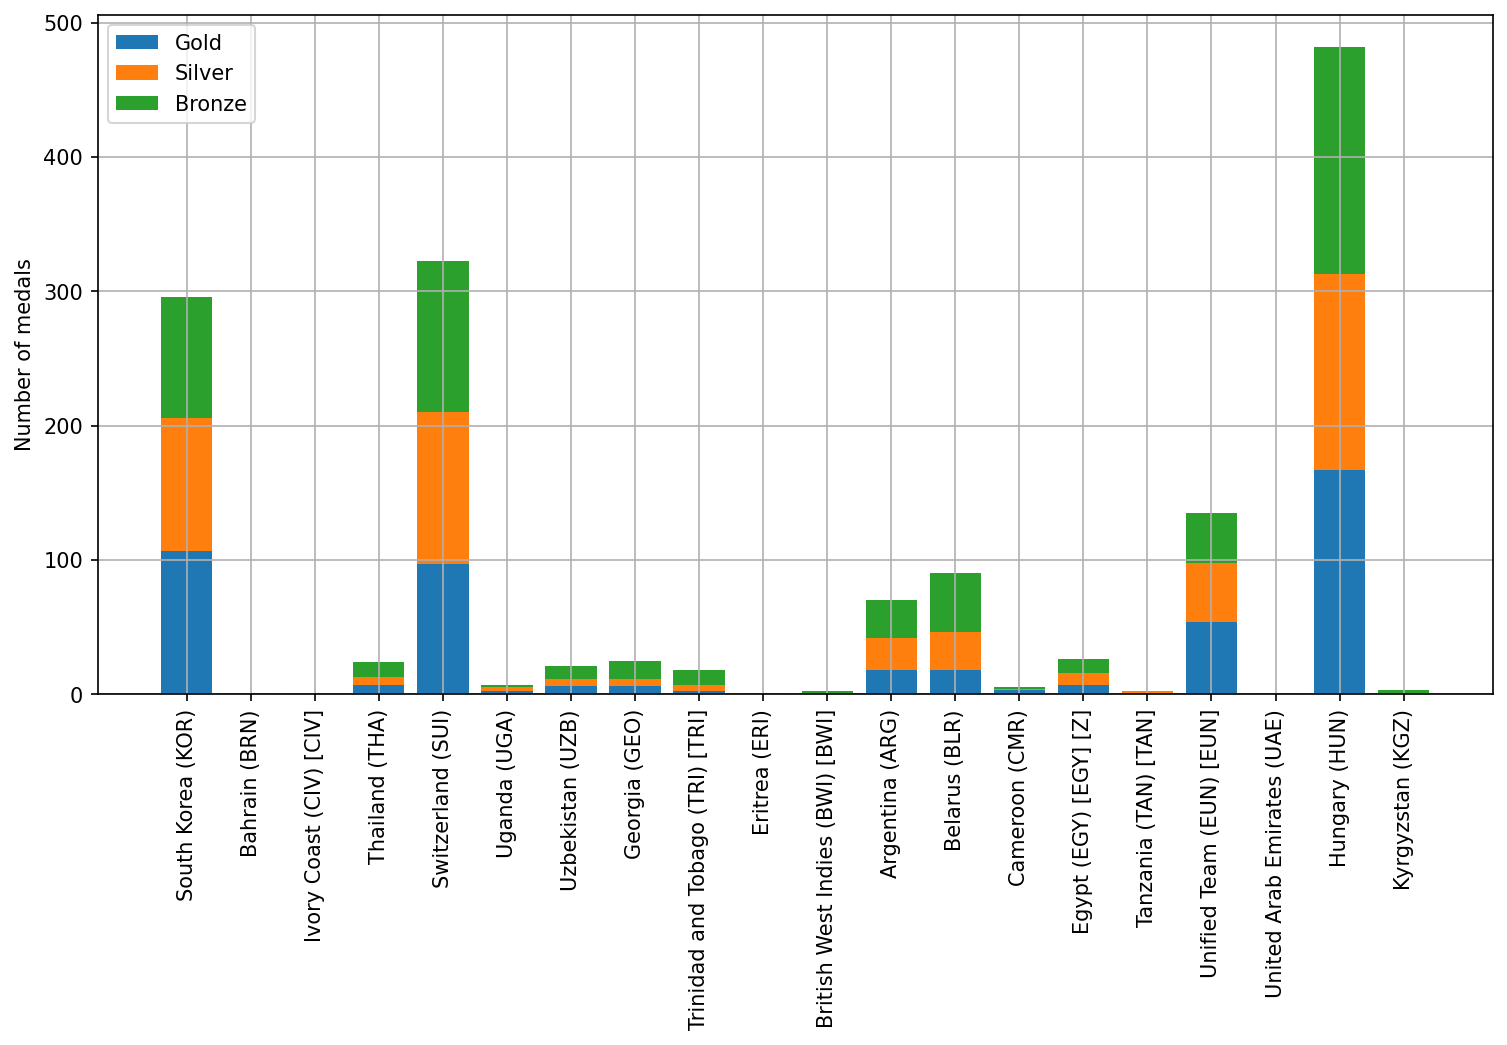

In [6]:
fig, ax = plt.subplots(figsize = (12, 6), dpi = 150)

ax.bar(olympics.index, olympics['Gold_Total'], label = "Gold")
ax.bar(olympics.index, olympics['Silver_Total'], label = "Silver", 
       bottom = olympics['Gold_Total'])
ax.bar(olympics.index, olympics['Bronze_Total'], label = "Bronze", 
       bottom = olympics['Gold_Total'] + olympics['Silver_Total'])

ax.set_xticklabels(olympics.index, rotation = 90)
ax.set_ylabel("Number of medals")
ax.legend()
plt.grid()
plt.show()

## Creating Histograms 

In [7]:
athletes = pd.read_csv('data/athletes.csv')

In [8]:
athletes.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [9]:
mens_rowing = athletes[(athletes.sport == 'rowing') & (athletes.sex == 'male')]
mens_rowing.dropna(inplace = True)
mens_gymnastics = athletes[(athletes.sport == 'gymnastics') & (athletes.sex == 'male')]
mens_gymnastics.dropna(inplace = True)

/home/jacob/Code/cs-notes/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/jacob/Code/cs-notes/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


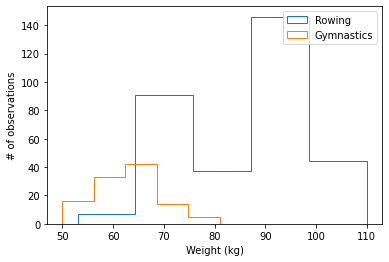

In [10]:
fig, ax = plt.subplots()

# Plot a histogram of "Weight" for mens_rowing
ax.hist(mens_rowing['weight'], label = "Rowing", histtype = "step", bins = 5)

# Compare to histogram of "Weight" for mens_gymnastics
ax.hist(mens_gymnastics['weight'], label = "Gymnastics", histtype = "step", bins = 5)

ax.set_xlabel("Weight (kg)")
ax.set_ylabel("# of observations")

# Add the legend and show the Figure
ax.legend()
plt.show()

## Adding error-bars to a bar chart

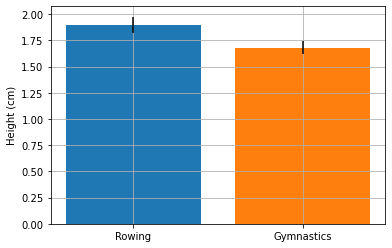

In [11]:
fig, ax = plt.subplots()

# Add a bar for the rowing "Height" column mean/std
ax.bar("Rowing", mens_rowing["height"].mean(), yerr=mens_rowing["height"].std())

# Add a bar for the gymnastics "Height" column mean/std
ax.bar("Gymnastics", mens_gymnastics["height"].mean(), yerr = mens_gymnastics["height"].std())

# Label the y-axis
ax.set_ylabel("Height (cm)")

plt.grid()
plt.show()

## Adding error-bars to a plot

Adding error-bars to a plot is done by using the `errorbars` method of the `Axes` object.

## Creating boxplots

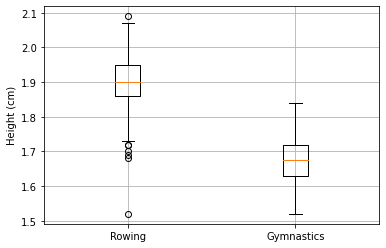

In [12]:
fig, ax = plt.subplots()

# Add a boxplot for the "Height" column in the DataFrames
ax.boxplot([mens_rowing["height"], mens_gymnastics["height"]])

# Add x-axis tick labels:
ax.set_xticklabels(["Rowing", "Gymnastics"])

# Add a y-axis label
ax.set_ylabel("Height (cm)")

plt.grid()
plt.show()

## Simple scatter plot

In [13]:
climate_change = pd.read_csv("data/climate_change.csv", index_col = [0], parse_dates = ['date'])

In [14]:
climate_change.head()

,co2,relative_temp
date,,
1958-03-06,315.71,0.10
1958-04-06,317.45,0.01
1958-05-06,317.50,0.08
1958-06-06,NaN,-0.05
1958-07-06,315.86,0.06


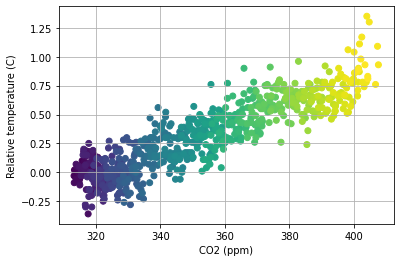

In [15]:
fig, ax = plt.subplots()

# Add data: "co2" on x-axis, "relative_temp" on y-axis
ax.scatter(climate_change["co2"], climate_change["relative_temp"], c = climate_change.index)

# Set the x-axis label to "CO2 (ppm)"
ax.set_xlabel("CO2 (ppm)")

# Set the y-axis label to "Relative temperature (C)"
ax.set_ylabel("Relative temperature (C)")

plt.grid()
plt.show()

## References

1. [pandas.DataFrame.sample](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html)